Multi-level OFIs are stored in this dataframe.
First level OFI is the best-level OFI.
                             ofi_00    ofi_01     ofi_02    ofi_03    ofi_04  \
ts_event                                                                       
2024-10-21 11:54:00+00:00  1.899744  5.560227   0.092670 -0.278011 -0.268744   
2024-10-21 11:55:00+00:00 -8.433355  5.266243  11.158543 -1.362594 -0.368269   
2024-10-21 11:56:00+00:00  1.816016  0.000000  10.950848  0.000000  0.036503   
2024-10-21 11:57:00+00:00  1.781990  7.101364   3.617174  5.133195 -1.418500   
2024-10-21 11:58:00+00:00 -2.883945  4.469679   2.082365 -1.463755 -9.157179   

                             ofi_05    ofi_06    ofi_07    ofi_08    ofi_09  \
ts_event                                                                      
2024-10-21 11:54:00+00:00 -2.085085 -1.853409 -0.407750 -1.436392 -3.706818   
2024-10-21 11:55:00+00:00 -1.252114 -0.092067 -1.012739 -0.920672 -0.506370   
2024-10-21 11:56:00+00:00  0.000000  

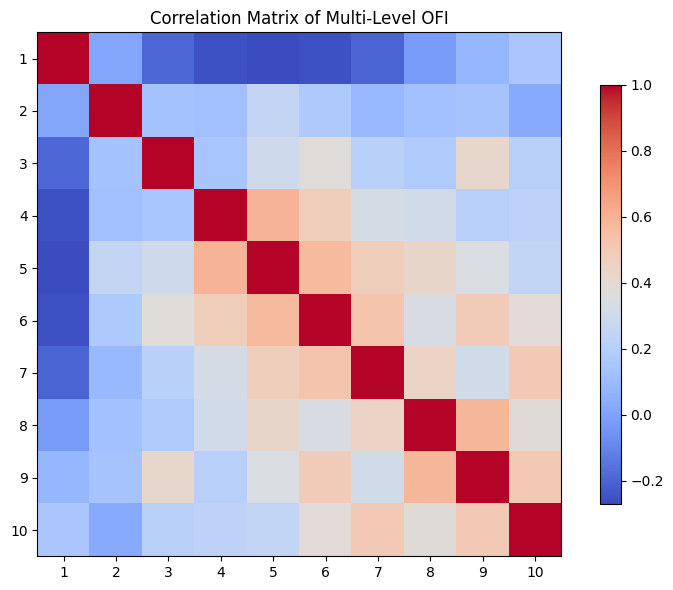

                               AAPL                                           \
                             ofi_00    ofi_01     ofi_02    ofi_03    ofi_04   
ts_event                                                                       
2024-10-21 11:54:00+00:00  1.899744  5.560227   0.092670 -0.278011 -0.268744   
2024-10-21 11:55:00+00:00 -8.433355  5.266243  11.158543 -1.362594 -0.368269   
2024-10-21 11:56:00+00:00  1.816016  0.000000  10.950848  0.000000  0.036503   
2024-10-21 11:57:00+00:00  1.781990  7.101364   3.617174  5.133195 -1.418500   
2024-10-21 11:58:00+00:00 -2.883945  4.469679   2.082365 -1.463755 -9.157179   

                                                                             \
                             ofi_05    ofi_06    ofi_07    ofi_08    ofi_09   
ts_event                                                                      
2024-10-21 11:54:00+00:00 -2.085085 -1.853409 -0.407750 -1.436392 -3.706818   
2024-10-21 11:55:00+00:00 -1.252114 -0.0920

In [38]:
from src.ofi import multi_asset_ofi
from src.data_loader import load_raw
from src.ofi import add_level_ofi, aggregate_ofi, integrated_ofi
from src.plots import corr_heatmap
from pathlib import Path

symbol = 'AAPL'
freq = '1min'
n_components = 10

raw = load_raw("data/multi-asset-dataset.csv")
sym_df = raw[raw["symbol"] == symbol]

msg_df = add_level_ofi(sym_df)
bar_df = aggregate_ofi(msg_df, freq=freq, normalise=True)
bar_df["ofi_integrated"] = integrated_ofi(bar_df, n_components)

print("Multi-level OFIs are stored in this dataframe.")
print("First level OFI is the best-level OFI.")
print(bar_df.head())

out_parquet = Path(f"ofi-data/{symbol}_ofi_{freq}.parquet")
bar_df.to_parquet(out_parquet)
print(f"Bar‑level OFI written to {out_parquet}")

corr_heatmap(bar_df, path=f"ofi-data/{symbol}_corr.png")

multi_asset_bars = multi_asset_ofi(raw, symbols=["AAPL", "JPM"], freq="1min")
# MultiIndex columns: ('AAPL', 'ofi_00') … ('JNJ', 'ofi_09')
print(multi_asset_bars.head())

multi_asset_bars.to_parquet("ofi-data/multi_asset_ofi.parquet")
print(f"Multi-asset bar‑level OFI written to multi_asset_ofi.csv")


In [36]:
# Best-OFI, multi-level and integrated OFI all in one dataframe
bar_df

,ofi_00,ofi_01,ofi_02,ofi_03,ofi_04,ofi_05,ofi_06,ofi_07,ofi_08,ofi_09,ofi_integrated
ts_event,,,,,,,,,,,
2024-10-21 11:54:00+00:00,1.899744,5.560227,0.092670,-0.278011,-0.268744,-2.085085,-1.853409,-0.407750,-1.436392,-3.706818,-0.391357
2024-10-21 11:55:00+00:00,-8.433355,5.266243,11.158543,-1.362594,-0.368269,-1.252114,-0.092067,-1.012739,-0.920672,-0.506370,2.211328
2024-10-21 11:56:00+00:00,1.816016,0.000000,10.950848,0.000000,0.036503,0.000000,0.000000,0.009126,0.000000,0.000000,1.725271
2024-10-21 11:57:00+00:00,1.781990,7.101364,3.617174,5.133195,-1.418500,1.445096,2.118884,3.138430,2.641956,5.399164,2.600535
2024-10-21 11:58:00+00:00,-2.883945,4.469679,2.082365,-1.463755,-9.157179,4.940172,-2.361176,-3.084340,-1.812268,-5.785316,-1.266961
...,...,...,...,...,...,...,...,...,...,...,...
2024-10-21 13:00:00+00:00,-1.012480,3.719645,10.124797,1.900430,-5.452230,-0.005414,-2.734237,0.460218,-0.671377,0.000000,1.202491
2024-10-21 13:01:00+00:00,1.531454,5.243102,1.717568,-2.520518,1.542089,1.738838,-1.754791,-2.743855,-1.068827,-3.270292,0.086700
2024-10-21 13:02:00+00:00,-17.650093,10.128324,15.877637,20.725827,18.581006,12.362513,8.162237,2.219294,-1.400092,1.683089,13.561333


In [37]:
# Multi-asset OFI for AAPL and JPM
multi_asset_bars

AAPL                                   \
                              ofi_00     ofi_01     ofi_02     ofi_03   
ts_event                                                                
2024-10-21 11:54:00+00:00   1.899744   5.560227   0.092670  -0.278011   
2024-10-21 11:55:00+00:00  -8.433355   5.266243  11.158543  -1.362594   
2024-10-21 11:56:00+00:00   1.816016   0.000000  10.950848   0.000000   
2024-10-21 11:57:00+00:00   1.781990   7.101364   3.617174   5.133195   
2024-10-21 11:58:00+00:00  -2.883945   4.469679   2.082365  -1.463755   
...                              ...        ...        ...        ...   
2024-10-21 13:00:00+00:00  -1.012480   3.719645  10.124797   1.900430   
2024-10-21 13:01:00+00:00   1.531454   5.243102   1.717568  -2.520518   
2024-10-21 13:02:00+00:00 -17.650093  10.128324  15.877637  20.725827   
2024-10-21 13:03:00+00:00  -3.499030   4.440394   5.976770  -0.106569   
2024-10-21 13:04:00+00:00  -1.540305   8.983631   2.021094   1.887542   

                                                                               \
                              ofi_04     ofi_05    ofi_06    ofi_07    ofi_08   
ts_event                                                                        
2024-10-21 11:54:00+00:00  -0.268744  -2.085085 -1.853409 -0.407750 -1.436392   
2024-10-21 11:55:00+00:00  -0.368269  -1.252114 -0.092067 -1.012739 -0.920672   
2024-10-21 11:56:00+00:00   0.036503   0.000000  0.000000  0.009126  0.000000   
2024-10-21 11:57:00+00:00  -1.418500   1.445096  2.118884  3.138430  2.641956   
2024-10-21 11:58:00+00:00  -9.157179   4.940172 -2.361176 -3.084340 -1.812268   
...                              ...        ...       ...       ...       ...   
2024-10-21 13:00:00+00:00  -5.452230  -0.005414 -2.734237  0.460218 -0.671377   
2024-10-21 13:01:00+00:00   1.542089   1.738838 -1.754791 -2.743855 -1.068827   
2024-10-21 13:02:00+00:00  18.581006  12.362513  8.162237  2.219294 -1.400092   
2024-10-21 13:03:00+00:00  -4.316063  -3.721050 -1.696230 -8.481152 -4.404870   
2024-10-21 13:04:00+00:00   4.318197   2.599822  0.810218  4.941442  4.407232   

                                           JPM                        \
                             ofi_09     ofi_00     ofi_01     ofi_02   
ts_event                                                               
2024-10-21 11:54:00+00:00 -3.706818   1.899744   5.560227   0.092670   
2024-10-21 11:55:00+00:00 -0.506370  -8.433355   5.266243  11.158543   
2024-10-21 11:56:00+00:00  0.000000   1.816016   0.000000  10.950848   
2024-10-21 11:57:00+00:00  5.399164   1.781990   7.101364   3.617174   
2024-10-21 11:58:00+00:00 -5.785316  -2.866520   4.469679   2.082365   
...                             ...        ...        ...        ...   
2024-10-21 13:00:00+00:00  0.000000  -1.012480   3.719645  10.124797   
2024-10-21 13:01:00+00:00 -3.270292   1.531454   5.243102   1.717568   
2024-10-21 13:02:00+00:00  1.683089 -14.671175  11.617783  19.638522   
2024-10-21 13:03:00+00:00 -1.491972  -1.474211   4.440394   5.976770   
2024-10-21 13:04:00+00:00  0.605438  -1.540305   8.983631   2.021094   

                                                                      \
                              ofi_03     ofi_04     ofi_05    ofi_06   
ts_event                                                               
2024-10-21 11:54:00+00:00  -0.278011  -0.268744  -2.085085 -1.853409   
2024-10-21 11:55:00+00:00  -1.362594  -0.368269  -1.252114 -0.092067   
2024-10-21 11:56:00+00:00   0.000000   0.036503   0.000000  0.000000   
2024-10-21 11:57:00+00:00   5.133195  -1.418500   1.445096  2.118884   
2024-10-21 11:58:00+00:00  -1.463755  -9.157179   4.940172 -2.361176   
...                              ...        ...        ...       ...   
2024-10-21 13:00:00+00:00   1.900430  -5.452230  -0.005414 -2.734237   
2024-10-21 13:01:00+00:00  -2.520518   1.542089   1.738838 -1.754791   
2024-10-21 13:02:00+00:00  20.949246  19.318288  13.107242  8.273947   
2